In [ ]:
# import some required packages
pip install clean-text
pip install Unidecode

In [1]:
#import all the required libraries
from selenium.webdriver.edge.service import Service
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import datetime
import matplotlib.pyplot as plt
from cleantext import clean
import pandas as pd

In [48]:
# function to set up the driver
def driver_setup_1():
    try:
        driver = webdriver.Edge(executable_path="C:/Users/digvijaysingh.singh/Downloads/edgedriver_win64/msedgedriver")
        time.sleep(5)
        print(driver)
        #go to instagram login page
        driver.get('https://www.instagram.com')
        time.sleep(5)
    except Error as e:
        print("Eror while trying to open instagram")
    finally:
        print("You are currently on instagram login page")
        return driver

def login(driver,username,password):
    try:
        username_element = driver.find_element(By.NAME,'username')
        username_element.send_keys(username)
        password_element = driver.find_element(By.NAME,'password')
        password_element.send_keys(password)
        time.sleep(4)
        password_element.submit()
        time.sleep(5)
        print("You are logged in")
    except NoSuchElementException:
        print("Could not logged in")

def popup_window():
    # if a popup window comes up aking to save your login info then this function is used
    try:
        pop_up_window = WebDriverWait(
        driver, 20).until(EC.presence_of_element_located(
            (By.XPATH, "/html/body/div[1]/div/div/div/div[1]/div/div/div/div[1]/section/main/div/div")))
        # click on not now button
        driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[1]/div/div/div/div[1]/section/main/div/div/div/div/button').click()
        print("Clicked on not now for now")

        # # if a popup window comes up aking to turn on notifications then this function is used
        try:
            pop_up_window_notification = WebDriverWait(
            driver, 20).until(EC.presence_of_element_located(
                (By.XPATH, "/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[2]/div/div/div/div/div[2]/div/div")))
            # click on not now button
            driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[2]/div/div/div/div/div[2]/div/div/div[3]/button[2]').click()
            print("Clicked on not now for now")

        except TimeoutException:
            print("No window aasking to turn of notification")

    except TimeoutException:
        print("No popup window asking to save your login info")
        
driver = driver_setup_1()
login(driver,'SAMPLE_USERNAME','SAMPLE_PASSWORD')
# calling popup_window function tocheck for any popup window
popup_window()

<ipython-input-48-6aabeeddc7c7>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Edge(executable_path="C:/Users/digvijaysingh.singh/Downloads/edgedriver_win64/msedgedriver")


<selenium.webdriver.edge.webdriver.WebDriver (session="b4c83a9a5a810664279365d0fa5b3f3f")>
You are currently on instagram login page
You are logged in
Clicked on not now for now
Clicked on not now for now


## Question no 1
to run the function for 1st question first you need to run first and 2nd cell to logged in into instagram

-------------------------The top 5 handles which have the highest number of followers are:----------------------
dilsefoodie 1048337
foodporn 1025413
foodtalkindia 308776
delhi_streets_food 40306
lucknowi.safarkhana 26243

------------------------No of posts made in last 3 days are:--------------------------------------
dilsefoodie 5
foodporn 4
foodtalkindia 5
delhi_streets_food 4
lucknowi.safarkhana 2


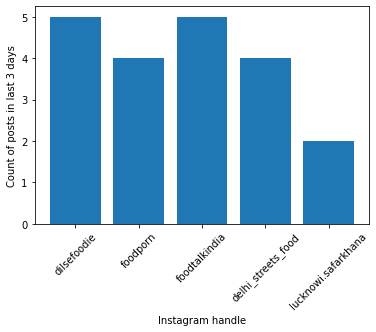

In [265]:
# we need to come tohomepage or clear
def clear_search_bar():
    driver.back()
    time.sleep(2)
    #clear the search bar
    driver.find_element(By.CLASS_NAME,'_aaw8').click()
    #WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aaw8'))).click()
    #ckick the closs div so that search bar return to it's initial position
    try:
        cross_div = WebDriverWait(
            driver, 3).until(EC.presence_of_element_located(
                (By.XPATH, '//div[contains(@class,"_9-lv")]')))
        driver.find_element(By.XPATH,'//div[contains(@class,"_9-lv")]').click()
    except TimeoutException:
        print("search bar is clear")
    finally:
        time.sleep(1)
        
# function to count no of posts
def count_of_posts(name):
    search_bar = driver.find_element(By.CLASS_NAME,'_aauy')
    # send keys to search bar 
    search_bar.send_keys(name)
    #we are looking for the first option in search list so we will find first element with class '_abm4' and click on it
    WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_abm4'))).click()
    # now first we will check if tere are pinned posts from previous dates if they are there then we need to go to current posts
    try:
        WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aatp')))
        time.sleep(3)
        pinned = driver.find_elements(By.CLASS_NAME,'_aatp')
        count = 0
        # we will check for all pinned posts
        for i in pinned:
            if i.find_element(By.CLASS_NAME,'_ab6-').get_attribute('aria-label') != 'Pinned post icon':
                break
            else:
                count+=1
        # as soon as pinned posts are over we will open the post and start to see the date
        driver.find_elements(By.CLASS_NAME,'_aagw')[count].click()
    except NoSuchElementException:
        # if there are no pinned posts then we will directly click on first post and start counting
        first_pic = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
        first_pic.click()
    # create a counter for post count
    count = 0
    while True:
        # first check if date of post is available then fetch the date
        date = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqe'))).get_attribute('title')
        # replace ',' in date and split on basis of space and take the 2ndelement of te list acc to our requirement and convert it into int
        date = int(date.replace(',','').split(' ')[1])
        present_date = datetime.datetime.now().day
        #  check if its not older than 3 days then increment the count else break the loop
        if (present_date - date) <= 3:
            count+=1
        else:
            break
            
        #click on the next btn to check next post
        try:
            next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button/div')
            next_btn.click()
        except NoSuchElementException:
            try:
                next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button/div')
                next_btn.click()
            except NoSuchElementException:
                # if there is no next btn then it myust be the last post
                print("we have covered all the posts")
    #clear search bar for next account
    clear_search_bar()
    return count

#function to see totalno of followers
def total_followers(handle):
    search_bar = driver.find_element(By.CLASS_NAME,'_aauy')
    # send keys to search bar 
    search_bar.send_keys(handle)
    #we are looking for the first option in search list so we will find first element with class '_abm4' and click on it
    WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_abm4'))).click()
    
    #now we will check for the no of followers
    WebDriverWait(driver, 20).until(EC.presence_of_element_located(
        (By.XPATH, "/html/body/div[1]/div/div/div/div[1]/div/div/div/div[1]/section/main/div/header/section/ul/li[2]/a/div")))
    followers = driver.find_elements(By.CLASS_NAME,'_ac2a')[1].get_attribute('title')
    
    # clear the searchbar
    clear_search_bar()
    
    # return the no of followers
    return followers

#execute 
if __name__ == "__main__":
    # the list of handles from previous project obtained on searching food is as follows
    list_of_handles = ['delhi_streets_food', 'food__diaries____', 'dilsefoodie', 'streetfood_walker', 'noidafooddiaries', 'lucknow_foodie',
                       'foodtalkindia', 'ghar.kaa.khana', 'foodporn', 'lucknowi.safarkhana']
    followers_dict = {}
    for handle in list_of_handles:
        no_of_followers = total_followers(handle)
        if handle not in followers_dict.keys():
            no_of_followers = no_of_followers.replace(',','')
            followers_dict[handle] = int(no_of_followers)
    #print(followers_dict)
    # now we will sort the dict in reverse order to get top handles first
    followers_dict = {key: val for key, val in sorted(followers_dict.items(), key = lambda ele: ele[1],reverse=True)}
    # we just neet top 5 so 
    followers_dict = dict(list(followers_dict.items())[0:5])
    print("-------------------------The top 5 handles which have the highest number of followers are:----------------------")
    for key in followers_dict.keys():
        print(key,followers_dict[key])
    print()
        
    # the list of top 5 handles names
    top_five_list = list(followers_dict.keys())
    #now we will try to find their no of posts in the last 3 days
    post_count = {}
    #apply loop on all names and it will return the count of post
    for i in top_five_list:
        # we called a function to count posts
        count = count_of_posts(i)
        #stored the values in a dict
        post_count[i] = count
        
    #print the dictionary
    print("------------------------No of posts made in last 3 days are:--------------------------------------")
    for key in post_count.keys():
        print(key,post_count[key])
        
    # now we will plot a bar graph
    keys = list(post_count.keys())
    values = list(post_count.values())
    plt.bar(keys,values)
    plt.xticks(rotation=45)
    plt.xlabel("Instagram handle")
    plt.ylabel("Count of posts in last 3 days")
    plt.show()

In [ ]:
# quit the driver when the task is done
driver.quit()

## Question no 2
to run the function for 2nd question first you need to run first and 2nd cell to logged in into instagram

In [121]:
# we need top five handles name list from previous question
print(top_five_list)

['dilsefoodie', 'foodporn', 'foodtalkindia', 'delhi_streets_food', 'lucknowi.safarkhana']


--------------------------The content of the first 10 posts of each handle----------------------------
bejad ki roti with laal maas dilsefoodie dilsecouple food laalmaas this diwali, kuch naya ho jayenew beginnings ke liye new meetha toh hona chahiye the festive edition by kwalitywalls gulab jamun ice cream dessert is perfect to start the celebration my wife loved the real gulab jamun pieces inside this ice cream aap log bhi try karo order now on zomato or get it from any kwality wall's freezer near you tyohaarwahimithaasnayi ad kwalitywalls diwalimeetha diwalidesserts dilsefoodie kwalitywallsgulabjamun diwali2022 gulabjamunicecream happydiwali and here we are 3d 3 dua's birthday papa, my and sukirti dilsecouple at tucasakitchenandbar , rajouri garden for family dinner and it was really good loved it dilsefoodie dilsecouple food birthday enjoying garma garam aloo bread pakoda dilsefoodie dilsecouple breadpakoda and thats chicken moussaka from turktarziofficial , defence colony it's ava

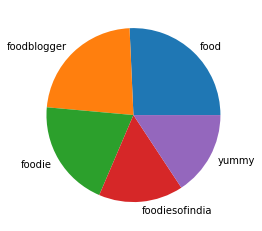

In [209]:
# function to clear search bar
def clear_searchbar():
    # clear search bar  
    driver.back()
    time.sleep(2)
    #clear the search bar
    driver.find_element(By.CLASS_NAME,'_aaw8').click()
    #WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aaw8'))).click()
    #ckick the closs div so that search bar return to it's initial position
    try:
        cross_div = WebDriverWait(
            driver, 3).until(EC.presence_of_element_located(
                (By.XPATH, '//div[contains(@class,"_9-lv")]')))
        driver.find_element(By.XPATH,'//div[contains(@class,"_9-lv")]').click()
    except TimeoutException:
        print("search bar is clear")
    finally:
        time.sleep(2)
        
# function to fetch top 5 hastags and plot a pie chart
def top_five_hastags_and_pie_plot(all_hastags):
    # list of all hastags
    list_of_hastags = all_hastags.split("#")
    # we will skip te first element as it contains nothing
    list_of_hastags = list_of_hastags[1:]
    
    # now find top 5 hastags we need to know the frequency of hastags we will use pandas dataframe
    df1 = pd.Series(list_of_hastags).value_counts().sort_index().reset_index().reset_index(drop=True)
    df1.columns = ['Hastag', 'Frequency']
    #print(df1)
    # now we need to find top 5 hastags so we will sort the df in descendin order and pick top 5 values
    df2 = df1.sort_values(by='Frequency',ascending=False)[:5].reset_index(drop=True)
    # now to print the values we have
    print("------------------------------Top five hastags and their counts ----------------------------------------")
    hastags=[]
    frequencies=[]
    for i in df2.values:
        print(i[0],i[1])
        hastags.append(i[0])
        frequencies.append(i[1])
    print()
    # now plot the pie chart
    plt.pie(frequencies,labels=hastags)
    plt.show()
    

# fetch all hastags function
def scrape_hastags(top_five_list):
    all_hastags = ''
    for name in top_five_list:
        search_bar = driver.find_element(By.CLASS_NAME,'_aauy')
        # send keys to search bar 
        search_bar.send_keys(name)
        #we are looking for the first option in search list so we will find first element with class '_abm4' and click on it
        WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_abm4'))).click()
        # let the page of search result load
        time.sleep(4)
        #click on first pic
        WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw'))).click()
        count = 0
        handle_hastags = ''
        while count < 10:
            local_hastags = ''
            WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aa06')))
            data = BeautifulSoup(driver.page_source)
            l = data.find(class_='_aacl _aaco _aacu _aacx _aad7 _aade').find_all('a')
            for i in l:
                a=i.string
                if a[0] == '#':
                    local_hastags = local_hastags + a

            try:
                next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button/div')
                next_btn.click()
            except NoSuchElementException:
                try:
                    next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button/div')
                    next_btn.click()
                except NoSuchElementException:
                    # if there is no next btn then it myust be the last post
                    print("we have covered all the posts")
            handle_hastags = handle_hastags + local_hastags
            count+=1
        all_hastags = all_hastags + handle_hastags
        # call clear_searchbar function
        clear_searchbar()
    return all_hastags
    

# function to create csv
def create_csv(content):
    # clean the string
    content = content.replace('(','')
    content = content.replace(')','')
    content = content.replace(':','')
    content = content.replace('-','')
    # convert to list
    list_of_words = content.split(" ")
    # print the list
    print("-----------------------------------------List containing All hastags used---------------------------------------------------")
    print(list_of_words)
    
    # now using pandas we will try to find frequency of each word
    df = pd.Series(list_of_words).value_counts().sort_index().reset_index().reset_index(drop=True)
    # declare the columns name
    df.columns = ['Word', 'Frequency']
    # remove the unwanted word
    df = df[df.Word!='']
    # now convert to csv
    df.to_csv(r'C:/Users/digvijaysingh.singh/Desktop/Coding Ninjas/frequency.csv', index=False)
    print("CSV created")
    print()

# function to scrape content
def scrape_content(top_five_list):
    grand_str = ''
    all_hastags = ''
    for name in top_five_list:
        search_bar = driver.find_element(By.CLASS_NAME,'_aauy')
        # send keys to search bar 
        search_bar.send_keys(name)
        #we are looking for the first option in search list so we will find first element with class '_abm4' and click on it
        WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_abm4'))).click()
        # let the page of search result load
        time.sleep(4)
        #click on first pic
        WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw'))).click()
        count = 0
        final_str = ''
        while count < 10:
            caption = ''
            text = ''
            hastags = ''
            WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aa06')))
            data = BeautifulSoup(driver.page_source)
            text_data = data.find(class_='_aacl _aaco _aacu _aacx _aad7 _aade').text
            if '#' in text_data:
                text = text_data.split('#',1)
                caption = text[0]
                hastags = text[1].split('#')
                for h in hastags:
                    caption = caption + " " + h.strip()
            else:
                caption = text_data
                
            time.sleep(1)

            try:
                next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button/div')
                next_btn.click()
            except NoSuchElementException:
                try:
                    next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button/div')
                    next_btn.click()
                except NoSuchElementException:
                    # if there is no next btn then it myust be the last post
                    print("we have covered all the posts")
            final_str = final_str + caption + ' '
            count+=1
        grand_str = grand_str + final_str + ' '
        # call clear_searchbar function
        clear_searchbar()
    # we also needed to remove some unwanted content from the string
    grand_str = grand_str.replace(".",'')
    grand_str = grand_str.replace("@",'')
    grand_str = grand_str.replace('!','')
    grand_str = grand_str.replace('?','')
    grand_str = grand_str.replace('  ','')
    grand_str = grand_str.replace("  ",' ')
    grand_str = grand_str.replace("  ",' ')
    #now remove the emojis also from the string
    grand_str = clean(content, no_emoji=True)
    
    # return the string
    return grand_str
    
#execute 
if __name__ == "__main__":
    # we need to scrape the content and hastags
    content = scrape_content(top_five_list)
    print("--------------------------The content of the first 10 posts of each handle----------------------------")
    print(content)
    # call the function to create csv
    create_csv(content)
    
    # now we want to fetch all the hastags
    all_hastags = scrape_hastags(top_five_list)
    
    # to find top 5 hastags
    top_hastags = top_five_hastags_and_pie_plot(all_hastags)
    
    

In [ ]:
# quit the driver when the task is done
driver.quit()

## Question no 3
to run the function for 2nd question first you need to run first and 2nd cell to logged in into instagram

In [216]:
# we will need top_five_list from previous question in this question
top_five_list

['dilsefoodie',
 'foodporn',
 'foodtalkindia',
 'delhi_streets_food',
 'lucknowi.safarkhana']

In [237]:
# we will be using followers_dict from question no 1 in this question
followers_dict

{'dilsefoodie': 1048277,
 'foodporn': 1025413,
 'foodtalkindia': 308770,
 'delhi_streets_food': 40307,
 'lucknowi.safarkhana': 26225}

----------------------------------List containg the likes of handles respecively----------------------------
[114218, 21060, 2514, 8306, 19432]
----------------------followers:likes ratio-----------------------------
dilsefoodie 91.78
foodporn 486.9
foodtalkindia 1228.2
delhi_streets_food 48.53
lucknowi.safarkhana 13.5


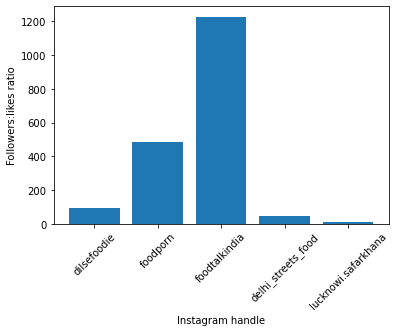

In [262]:
# function to clear search bar
def clear_search__bar():
    # clear search bar  
    driver.back()
    time.sleep(2)
    #clear the search bar
    driver.find_element(By.CLASS_NAME,'_aaw8').click()
    #WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aaw8'))).click()
    #ckick the closs div so that search bar return to it's initial position
    try:
        cross_div = WebDriverWait(
            driver, 3).until(EC.presence_of_element_located(
                (By.XPATH, '//div[contains(@class,"_9-lv")]')))
        driver.find_element(By.XPATH,'//div[contains(@class,"_9-lv")]').click()
    except TimeoutException:
        print("search bar is clear")
    finally:
        time.sleep(2)
        
# this fuction creates the list that contains the count of likes for each handle        
def count_likes():
    likes_list = []
    for name in top_five_list:
        search_bar = driver.find_element(By.CLASS_NAME,'_aauy')
        # send keys to search bar 
        search_bar.send_keys(name)
        #we are looking for the first option in search list so we will find first element with class '_abm4' and click on it
        WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_abm4'))).click()
        # let the page of search result load
        time.sleep(4)
        try:
            WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aatp')))
            #time.sleep(3)
            pinned = driver.find_elements(By.CLASS_NAME,'_aatp')
            count = 0
            # we will check for all pinned posts
            for i in pinned:
                if i.find_element(By.CLASS_NAME,'_ab6-').get_attribute('aria-label') != 'Pinned post icon':
                    break
                else:
                    count+=1
            # as soon as pinned posts are over we will open the post and start to see the date
            driver.find_elements(By.CLASS_NAME,'_aagw')[count].click()
        except NoSuchElementException:
            # if there are no pinned posts then we will directly click on first post and start counting
            first_pic = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
            first_pic.click()
        count = 0
        handle_likes = 0
        while count < 10:
            local_likes = ''
            # we will check is likes can be located
            likes_div = WebDriverWait(driver, 20).until(EC.presence_of_element_located(
                (By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div/a/div/span')))
            # now we will fetch the likes in form of string and then convert it into int
            like_str = likes_div.text
            local_likes = int(like_str.replace(',',''))

            # click the next button
            try:
                next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button/div')
                next_btn.click()
            except NoSuchElementException:
                try:
                    next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button/div')
                    next_btn.click()
                except NoSuchElementException:
                    # if there is no next btn then it myust be the last post
                    print("we have covered all the posts")
            handle_likes = handle_likes + local_likes
            count+=1
        likes_list.append(handle_likes)
        # clear the search bar
        clear_search__bar()
    return likes_list

#execute 
if __name__ == "__main__":
    # we will create a list containing the count of likes of handles
    likes_list = count_likes()
    print("----------------------------------List containg the likes of handles respecively----------------------------")
    print(likes_list)
    # create a dict
    ratio_dict = {}
    i = 0
    # usin for loop we will calculate the required ratio
    for key in followers_dict.keys():
        avg_likes = likes_list[i]/10
        ratio = followers_dict[key]/avg_likes
        # store in dict
        ratio_dict[key] = round(ratio,2)
        i+=1
        
    print("----------------------followers:likes ratio-----------------------------")
    for key in ratio_dict.keys():
        print(key,ratio_dict[key])
        
    # now plot the bar graph
    keys = list(ratio_dict.keys())
    values = list(ratio_dict.values())
    plt.bar(keys,values)
    plt.xticks(rotation=45)
    plt.xlabel("Instagram handle")
    plt.ylabel("Followers:likes ratio")
    plt.show()

In [ ]:
# quit the driver when the task is done
driver.quit()

In [235]:
likes_list = []
for name in top_five_list:
    search_bar = driver.find_element(By.CLASS_NAME,'_aauy')
    # send keys to search bar 
    search_bar.send_keys(name)
    #we are looking for the first option in search list so we will find first element with class '_abm4' and click on it
    WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_abm4'))).click()
    # let the page of search result load
    time.sleep(4)
    try:
        WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aatp')))
        #time.sleep(3)
        pinned = driver.find_elements(By.CLASS_NAME,'_aatp')
        count = 0
        # we will check for all pinned posts
        for i in pinned:
            if i.find_element(By.CLASS_NAME,'_ab6-').get_attribute('aria-label') != 'Pinned post icon':
                break
            else:
                count+=1
        # as soon as pinned posts are over we will open the post and start to see the date
        driver.find_elements(By.CLASS_NAME,'_aagw')[count].click()
    except NoSuchElementException:
        # if there are no pinned posts then we will directly click on first post and start counting
        first_pic = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
        first_pic.click()
    count = 0
    handle_likes = 0
    while count < 10:
        local_likes = ''
        # we will check is likes can be located
        likes_div = WebDriverWait(driver, 20).until(EC.presence_of_element_located(
            (By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div/a/div/span')))
        # now we will fetch the likes in form of string and then convert it into int
        like_str = likes_div.text
        local_likes = int(like_str.replace(',',''))
        
        # click the next button
        try:
            next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button/div')
            next_btn.click()
        except NoSuchElementException:
            try:
                next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button/div')
                next_btn.click()
            except NoSuchElementException:
                # if there is no next btn then it myust be the last post
                print("we have covered all the posts")
        handle_likes = handle_likes + local_likes
        count+=1
    likes_list.append(handle_likes)
    # clear search bar  
    driver.back()
    time.sleep(2)
    #clear the search bar
    driver.find_element(By.CLASS_NAME,'_aaw8').click()
    #WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aaw8'))).click()
    #ckick the closs div so that search bar return to it's initial position
    try:
        cross_div = WebDriverWait(
            driver, 3).until(EC.presence_of_element_located(
                (By.XPATH, '//div[contains(@class,"_9-lv")]')))
        driver.find_element(By.XPATH,'//div[contains(@class,"_9-lv")]').click()
    except TimeoutException:
        print("search bar is clear")
    finally:
        time.sleep(2)

In [236]:
likes_list

[112825, 21021, 2495, 8292, 19294]

In [239]:
followers_dict

{'dilsefoodie': 1048277,
 'foodporn': 1025413,
 'foodtalkindia': 308770,
 'delhi_streets_food': 40307,
 'lucknowi.safarkhana': 26225}

In [260]:
ratio_dict = {}
i = 0
for key in followers_dict.keys():
    avg_likes = likes_list[i]/10
    ratio = followers_dict[key]/avg_likes
    ratio_dict[key] = round(ratio,2)
    i+=1
ratio_dict

{'dilsefoodie': 92.91,
 'foodporn': 487.8,
 'foodtalkindia': 1237.56,
 'delhi_streets_food': 48.61,
 'lucknowi.safarkhana': 13.59}

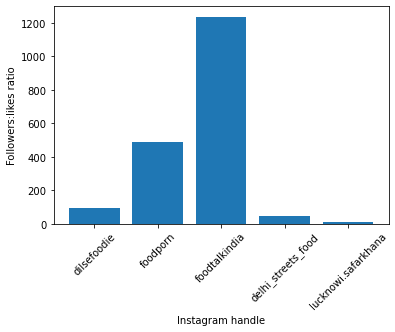

In [244]:
keys = list(ratio_dict.keys())
values = list(ratio_dict.values())
plt.bar(keys,values)
plt.xticks(rotation=45)
plt.xlabel("Instagram handle")
plt.ylabel("Followers:likes ratio")
plt.show()

In [225]:
likes_div = WebDriverWait(driver, 20).until(EC.presence_of_element_located(
                (By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div/a/div/span')))

#data = BeautifulSoup(likes_div.get_ttribute('outerHTML'))
like_str = likes_div.text
local_likes = int(like_str.replace(',',''))
local_likes

int

In [149]:
data = BeautifulSoup(driver.page_source)

In [159]:
l=data.find(class_='_aacl _aaco _aacu _aacx _aad7 _aade').find_all('a')
s=''
for i in l:
    a=i.string
    s=s+a
print(s)

#asianfood#indochinesefood#sushi#dimsum#ramen#wok#lucknow#lucknowfood


In [153]:
text_org = data.find(class_='_aacl _aaco _aacu _aacx _aad7 _aade').text
c=text[1]
text_org

'Are you looking for a one-stop destination for Pan Asian and Indo Chinese Cuisine? Then Chango’s is the place for you🍱They provide a variety of •Dimsums•Sushi •Wok•Ramen and many other options.Also, you must try the Wok Box and Bento Box which come with an option of  customisation(veg/non-veg options).So when are you planning to fulfill your Asian Food cravings?Let us know in the comments below💬📍 Captain Manoj Pandey Circle, Vishal Khand, Gomti Nagar, Lucknow.. .......#asianfood #indochinesefood #sushi #dimsum #ramen #wok #lucknow #lucknowfood'

In [94]:
all_hastags = ''
if '#' in text_org:
    text = text_org.split('#',1)
    caption = text[0]
    hastags = text[1].split('#')
    # here we ate storing all hastags in a string for the next part of the question
    all_hastags = all_hastags + text[1] + '#'
    print(all_hastags)
    for h in hastags:
        caption = caption + " " + h.strip()
else:
    caption = text
print(type(all_hastags))

<class 'str'>


In [95]:
caption

['Bejad Ki Roti With Laal Maas 😍', 'dilsefoodie #dilsecouple #food #laalmaas']

In [242]:
top_five_list

['dilsefoodie',
 'foodporn',
 'foodtalkindia',
 'delhi_streets_food',
 'lucknowi.safarkhana']

In [15]:
text = data.find(class_='_aacl _aaco _aacu _aacx _aad7 _aade').text.split('#',1)
text

['Bejad Ki Roti With Laal Maas 😍', 'dilsefoodie #dilsecouple #food #laalmaas']

In [16]:
caption = text[0]
caption

'Bejad Ki Roti With Laal Maas 😍'

In [20]:
hastags = text[1].split('#')
hastags
for h in hastags:
    caption = caption + " " + h.strip()
caption

str

In [51]:
search_bar = driver.find_element(By.CLASS_NAME,'_aauy')
# send keys to search bar 
search_bar.send_keys(name)
#we are looking for the first option in search list so we will find first element with class '_abm4' and click on it
WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_abm4'))).click()
#click on first pic
WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw'))).click()
print("clicked")
time.sleep(3)
count = 0
final_str = ''
WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw'))).click()
count = 0
final_str = ''
while count < 10:
    caption = ''
    text = ''
    hastags = ''
    WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME,'_aa06')))
    data = BeautifulSoup(driver.page_source)
    text = data.find(class_='_aacl _aaco _aacu _aacx _aad7 _aade').text.split('#',1)
    if '#' in text:
        caption = text[0]
        hastags = text[1].split('#')
        for h in hastags:
            caption = caption + " " + h.strip()
    else:
        caption = text[0]
    
    try:
        next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button/div')
        next_btn.click()
    except NoSuchElementException:
        try:
            next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button/div')
            next_btn.click()
        except NoSuchElementException:
            # if there is no next btn then it myust be the last post
            print("we have covered all the posts")
    final_str = final_str + " " + caption
    count+=1

In [127]:

content = content.replace('(','')
content = content.replace(')','')
content = content.replace(':','')
content = content.replace('-','')

In [128]:
content

'bejad ki roti with laal maas dilsefoodie dilsecouple food laalmaas this diwali, kuch naya ho jayenew beginnings ke liye new meetha toh hona chahiye the festive edition by kwalitywalls gulab jamun ice cream dessert is perfect to start the celebration my wife loved the real gulab jamun pieces inside this ice cream aap log bhi try karo order now on zomato or get it from any kwality wall\'s freezer near you tyohaarwahimithaasnayi ad kwalitywalls diwalimeetha diwalidesserts dilsefoodie kwalitywallsgulabjamun diwali2022 gulabjamunicecream happydiwali and here we are 3d  3 dua\'s birthday papa, my and sukirti dilsecouple  at tucasakitchenandbar , rajouri garden for family dinner and it was really good loved it dilsefoodie dilsecouple food birthday enjoying garma garam aloo bread pakoda dilsefoodie dilsecouple breadpakoda and thats chicken moussaka from turktarziofficial , defence colony it\'s available on swiggy, zomato and magicpin dilsefoodie dilsecouple turkishfood turktarzi when in kolka

In [166]:
list_of_hastags = all_hastags.split("#")

In [169]:
list_of_hastags=list_of_hastags[1:]
print(list_of_hastags)

['dilsefoodie', 'dilsecouple', 'kachori', 'jaipur', 'dilsefoodie', 'dilsecouple', 'food', 'laalmaas', 'TyohaarWahiMithaasNayi', 'Ad', 'KwalityWalls', 'DiwaliMeetha', 'DiwaliDesserts', 'dilsefoodie', 'KwalityWallsGulabJamun', 'Diwali2022', 'GulabJamunIceCream', 'HappyDiwali', 'dilsefoodie', 'dilsecouple', 'food', 'birthday', 'dilsefoodie', 'dilsecouple', 'breadpakoda', 'dilsefoodie', 'dilsecouple', 'turkishfood', 'turktarzi', 'dilsefoodie', 'dilsecouple', 'roll', 'kolkataroll', 'dilsefoodie', 'dilsecouple', 'food', 'biryani', 'dilsefoodie', 'dilsecouple', 'karwachauth', 'dilsefoodie', 'dilsecouple', 'karwachauth', 'FOODPORN', 'ItsOnlyFood', 'GetYourMindOutOfTheGutter', 'GiveawayAlert', 'coffee', 'coldbrew', 'cocktails', 'festive', 'wokecoldbrew', 'foodtalkindia', 'foodtalk', 'fti', 'food', 'foodie', 'foodies', 'foodgram', 'foodgasm', 'foodiesofindia', 'foodblogger', 'foodfeed', 'delicious', 'yummy', 'instagood', 'instafood', 'instagram', 'discover', 'NewInTown', 'starbucks', 'starbucksi

In [131]:
import pandas as pd

In [171]:
df1 = pd.Series(list_of_hastags).value_counts().sort_index().reset_index().reset_index(drop=True)
df1.columns = ['Hastag', 'Frequency']

In [174]:
#df1 = df1[df.Hastag!='']

In [175]:
df1

,Hastag,Frequency
0,24x7,1
1,25k,1
2,Ad,1
3,Diwali2022,1
4,DiwaliDesserts,1
...,...,...
164,wokecoldbrew,1
165,yummy,11
166,yummyfood,2
167,yummyinmytummy,3


In [191]:
df2 = df1.sort_values(by='Frequency',ascending=False)[:5].reset_index(drop=True)
df2

,Hastag,Frequency
0,food,18
1,foodblogger,16
2,foodie,14
3,foodiesofindia,11
4,yummy,11


In [201]:
for i in range(5):
    #print(df.loc[(i,1)])
    print(df2.loc[(i)])

Hastag       food
Frequency      18
Name: 0, dtype: object
Hastag       foodblogger
Frequency             16
Name: 1, dtype: object
Hastag       foodie
Frequency        14
Name: 2, dtype: object
Hastag       foodiesofindia
Frequency                11
Name: 3, dtype: object
Hastag       yummy
Frequency       11
Name: 4, dtype: object


In [148]:
df.to_csv(r'C:/Users/digvijaysingh.singh/Desktop/Coding Ninjas/frequency.csv', index=False)

In [206]:
hastags=[]
frequencies=[]
for i in df2.values:
    print(i[0],i[1])
    hastags.append(i[0])
    frequencies.append(i[1])

food 18
foodblogger 16
foodie 14
foodiesofindia 11
yummy 11


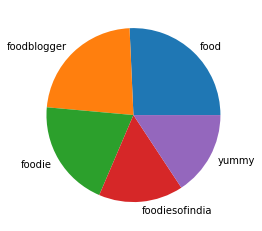

In [207]:
plt.pie(frequencies,labels=hastags)
plt.show()

In [214]:
followers_dict

{'dilsefoodie': 1048277,
 'foodporn': 1025413,
 'foodtalkindia': 308770,
 'delhi_streets_food': 40307,
 'lucknowi.safarkhana': 26225}